### SVM (Support Vector Machine)

- SVM 이 풀고 싶은 문제
 - 분류!
 - SVM 은 두 집단을 최대한 깔끔하게 나누고 싶어서 생긴 모델.
 - 어떤 데이터 X 가 들어왔을 때. 이 데이터가 A 그룹인지 B 그룹인지 분류하는 모델을 만드는게 목표다.


- SVM 의 목표
 - Margin 을 최대로 확보하는 선을 긋자.
 - 데이터와 선 사이의 거리가 넓으면 넓을수록,
   - 새로운 데이터가 들어왔을 때, 틀릴 가능성이 줄어든다.
 - SVM 의 두 가지 포인트
   - Margin 최대화
   - Support Vector 가 중요하다.
     - 경계에 붙어있는 몇 개의 점이, 전체 결정 경계를 결정 함.

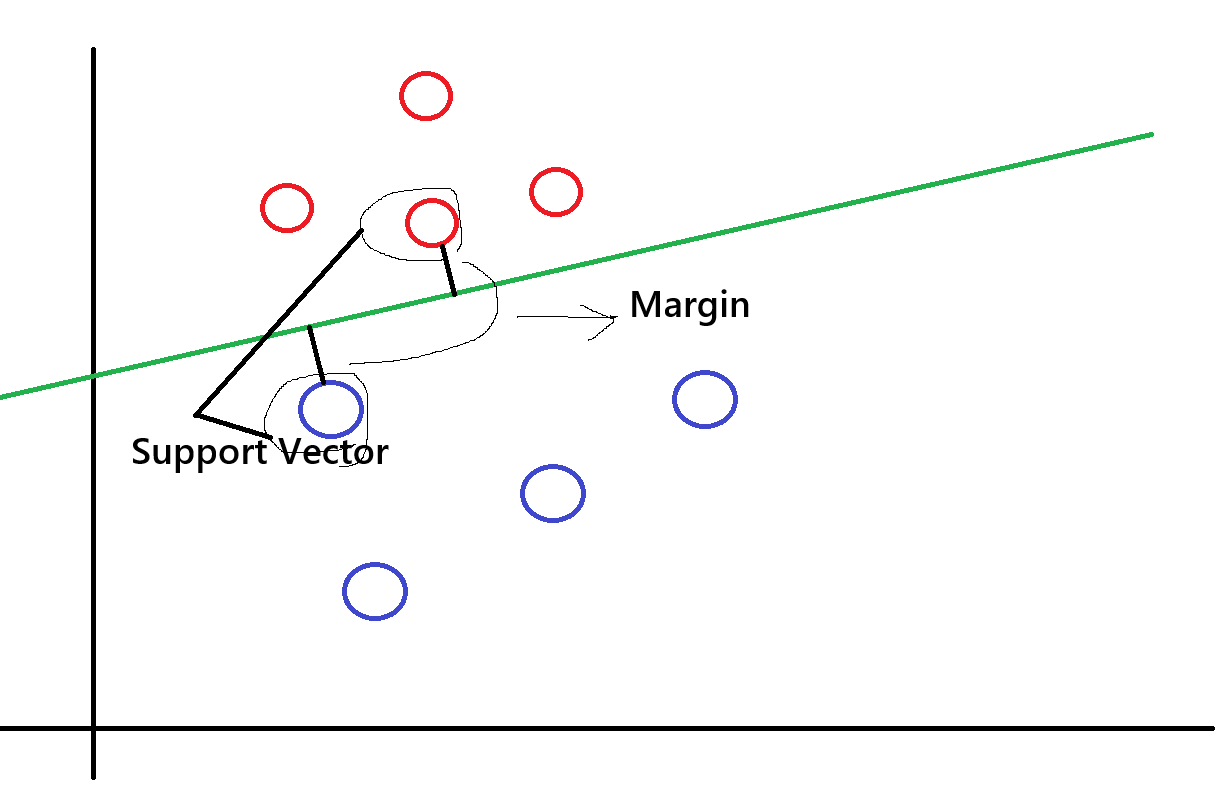

Margin 은 클래스 말단에 위치한 데이터 사이의 거리이고
Support Vector 는 Margin을 결정하게 되는 데이터이다.

Support Vector 를 통해 N차원의 데이터를 N-1 차원의 초평면을 가지고 구분 하는것이 Support Vector Machine 이다.


그래서 2차원 데이터는 1차원 선분을 긋고
3차원 데이터는 2차원 평면을 그리고...

와 같은 식으로 된다.

### SVM Kernel Trick

- SVM 은 기본적으로 직선 / 평면 등을 그리기 떄문에 (선형이기 때문에)
- 선형으로 나눠지지 않는 데이터들을 구분할 수 없다.
- 그래서 차원을 확장해서 구분한다.

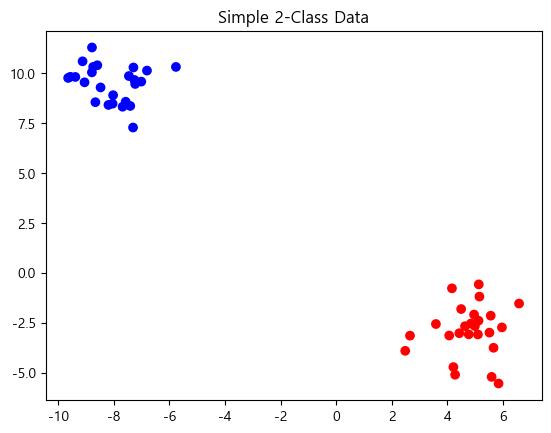

In [16]:
from sklearn import datasets
import matplotlib.pyplot as plt

X, y = datasets.make_blobs(n_samples=50, centers=2, random_state=47)

plt.scatter(X[:,0], X[:,1], c=y, cmap="bwr")
plt.title("Simple 2-Class Data")
plt.show()

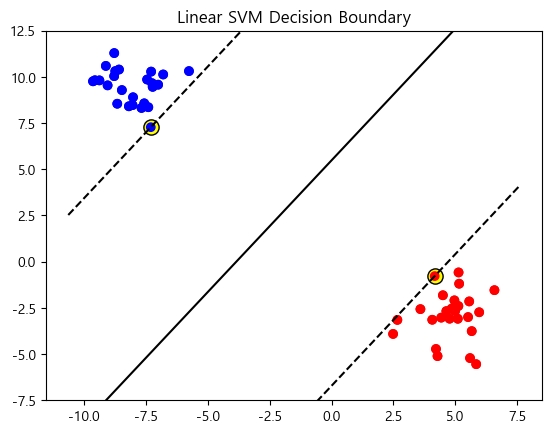

In [17]:
from sklearn.svm import SVC
import numpy as np

svc = SVC(kernel="linear")
svc.fit(X, y)

w = svc.coef_[0]
b = svc.intercept_[0]

xmin, xmax = X[:,0].min()-1, X[:,0].max()+1
xx = np.linspace(xmin, xmax, 100)

yy = -(w[0]/w[1]) * xx - b/w[1]

margin = 1 / np.linalg.norm(w)
yy_down = yy + np.sqrt(1 + (w[0]/w[1])**2) * margin
yy_up   = yy - np.sqrt(1 + (w[0]/w[1])**2) * margin

plt.scatter(X[:,0], X[:,1], c=y, cmap="bwr")
plt.scatter(svc.support_vectors_[:,0],
            svc.support_vectors_[:,1],
            color="yellow", edgecolors="black", s=120)

plt.ylim(-7.5, 12.5)
plt.scatter(X[:,0], X[:,1], c=y, cmap="bwr")
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')


plt.title("Linear SVM Decision Boundary")
plt.show()

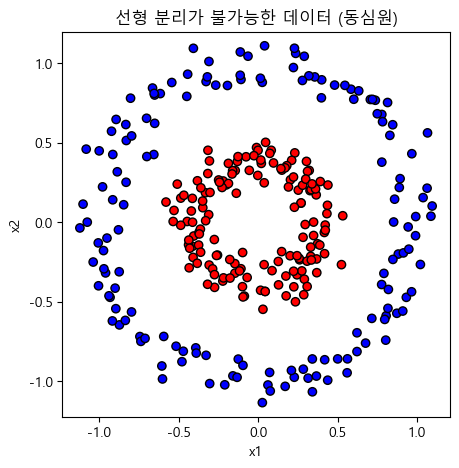

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC, LinearSVC
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.font_manager as fm
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=300, noise=0.08, factor=0.4, random_state=45)
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="bwr", edgecolors="k")
plt.title("선형 분리가 불가능한 데이터 (동심원)")
plt.xlabel("x1")
plt.ylabel("x2")
plt.axis("equal")
plt.show()

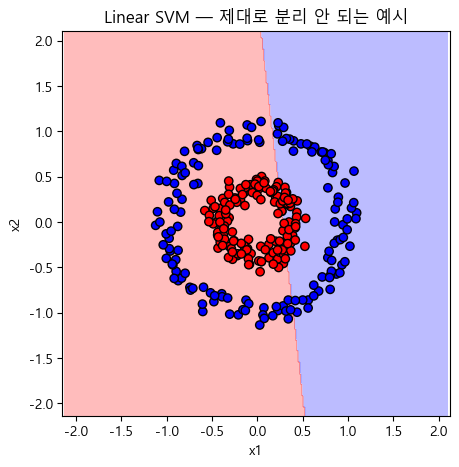

In [19]:
svc_linear = SVC(kernel="linear")
svc_linear.fit(X, y)

xx, yy = np.meshgrid(
    np.linspace(X[:, 0].min()-1, X[:, 0].max()+1, 300),
    np.linspace(X[:, 1].min()-1, X[:, 1].max()+1, 300)
)
Z = svc_linear.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(5, 5))
plt.contourf(xx, yy, Z, alpha=0.3, cmap="bwr")
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="bwr", edgecolors="k")
plt.title("Linear SVM — 제대로 분리 안 되는 예시")
plt.xlabel("x1")
plt.ylabel("x2")
plt.axis("equal")
plt.show()


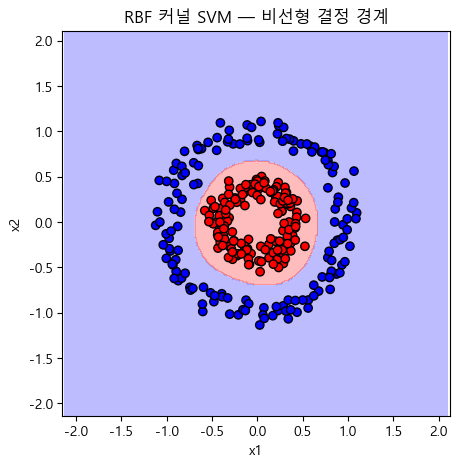

In [20]:
svc_rbf = SVC(kernel="rbf", gamma=5, C=1.0)
svc_rbf.fit(X, y)

Z = svc_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(5, 5))
plt.contourf(xx, yy, Z, alpha=0.3, cmap="bwr")
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="bwr", edgecolors="k")
plt.title("RBF 커널 SVM — 비선형 결정 경계")
plt.xlabel("x1")
plt.ylabel("x2")
plt.axis("equal")
plt.show()


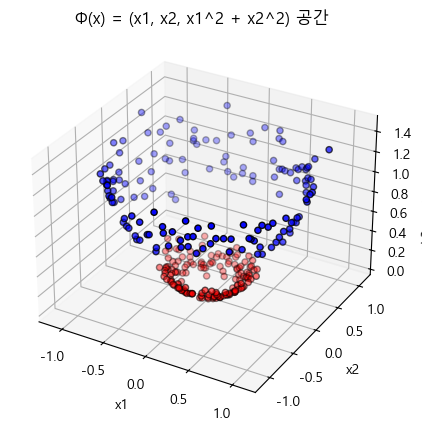

In [21]:
# φ3 = x1^2 + x2^2 라는 새 차원 추가
phi3 = (X[:, 0]**2 + X[:, 1]**2).reshape(-1, 1)
X2 = np.hstack([X, phi3])

fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X2[:, 0], X2[:, 1], X2[:, 2], c=y, cmap="bwr", edgecolors="k")
ax.set_title("Φ(x) = (x1, x2, x1^2 + x2^2) 공간")
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("r^2 = x1^2 + x2^2")
plt.show()


w: [-0.01312131 -0.08516939 -3.26668558]
b: 1.6852909037129629


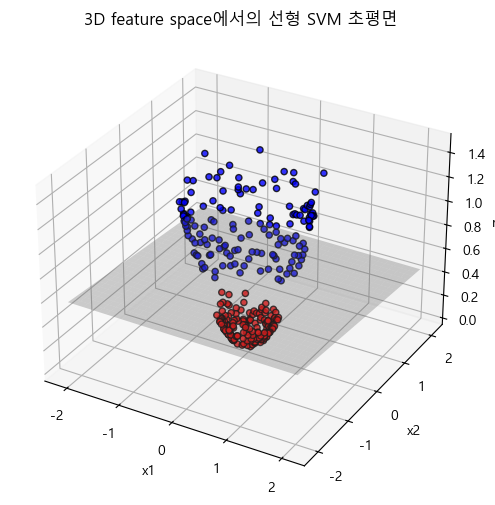

In [22]:
lin3 = LinearSVC(C=1.0)
lin3.fit(X2, y)

w = lin3.coef_[0]
b = lin3.intercept_[0]

print("w:", w)
print("b:", b)

xx, yy = np.meshgrid(
    np.linspace(X2[:,0].min()-1, X2[:,0].max()+1, 30),
    np.linspace(X2[:,1].min()-1, X2[:,1].max()+1, 30)
)
zz = (-b - w[0]*xx - w[1]*yy) / w[2]

fig = plt.figure(figsize=(7, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X2[:,0], X2[:,1], X2[:,2], c=y, cmap="bwr", edgecolors="k", alpha=0.8)

ax.plot_surface(xx, yy, zz, alpha=0.3, color='gray')

ax.set_title("3D feature space에서의 선형 SVM 초평면")
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("r^2")
plt.show()



실제로 위와 같은 Kernel Data 를 고차원으로 맵핑 하는것은 아님.

SVM 이 필요한 것은, 변환된 벡터들 간의 내적밖에 없기 때문에

실제 매핑을 하지 않고, 내적만 빠르게 계산하는 함수를 사용해서, 고차원에서 계산했을때와 동일한 결과를 얻을 방법이 있음.

그 방식을 써서 고차원으로 올려서 평면을 그리는것과 같은 효과를 발휘하도록 해서 직선으로 구분 할 수 없는 데이터도 구분 하는 방식입니다.